In [93]:
import pandas as pd
import numpy as np

In [94]:
ipl_data = {
    'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'], 
    'Rank': [1, 2, 2, 3, 3,4,1,1,2, 4,1,2], 
    'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, None, 2017],
    'Points': [876,789,863, None, 741, 812, None, 788, 694,701,804,690]
}

df = pd.DataFrame(ipl_data)

df

,Team,Rank,Year,Points
0,Riders,1,2014.0,876.0
1,Riders,2,2015.0,789.0
2,Devils,2,2014.0,863.0
3,Devils,3,2015.0,NaN
4,Kings,3,2014.0,741.0
5,kings,4,2015.0,812.0
6,Kings,1,2016.0,NaN
7,Kings,1,2017.0,788.0
8,Riders,2,2016.0,694.0
9,Royals,4,2014.0,701.0


In [95]:
mean_year = df['Year'].mean()
mean_points = df['Points'].mean()

df['Year'].fillna(mean_year ,inplace=True)
df['Points'].fillna(mean_points, inplace=True)

df

C:\Users\USER\AppData\Local\Temp\ipykernel_23256\233861777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(mean_year ,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_23256\233861777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

,Team,Rank,Year,Points
0,Riders,1,2014.000000,876.0
1,Riders,2,2015.000000,789.0
2,Devils,2,2014.000000,863.0
3,Devils,3,2015.000000,775.8
4,Kings,3,2014.000000,741.0
5,kings,4,2015.000000,812.0
6,Kings,1,2016.000000,775.8
7,Kings,1,2017.000000,788.0
8,Riders,2,2016.000000,694.0
9,Royals,4,2014.000000,701.0


In [96]:
grouped_mean = df.groupby('Year')['Points'].mean()
grouped_mean_df = pd.DataFrame(grouped_mean)
grouped_mean_df

,Points
Year,
2014.000000,795.250000
2015.000000,792.266667
2015.181818,804.000000
2016.000000,734.900000
2017.000000,739.000000


In [97]:
stdev = df['Points'].std()
SE = stdev/np.sqrt(df['Points'].count())

stdev, SE

(61.000447092251264, 17.6093122746994)

<h2>Practical aspect in the PDF material focusing on parkison disease detention</h2>
using data from UC Irvine Machine Learning Repository for Parkinson’s disease detection.

In [98]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

df

# Set the index to the 'name' column and drop it
df.set_index("name", inplace=True, drop=True)

In [99]:
# Drop rows with missing values
df.dropna(inplace=True)

# convert the data to float type
df = df.astype(float)

# Replace the status column values with named labels
labels = ['healthy', 'PD']
df["status"] = df["status"].replace({0: labels[0], 1: labels[1]})

df['status']

name
phon_R01_S01_1         PD
phon_R01_S01_2         PD
phon_R01_S01_3         PD
phon_R01_S01_4         PD
phon_R01_S01_5         PD
                   ...   
phon_R01_S50_2    healthy
phon_R01_S50_3    healthy
phon_R01_S50_4    healthy
phon_R01_S50_5    healthy
phon_R01_S50_6    healthy
Name: status, Length: 195, dtype: object

In [100]:
# splitting data for train and test 
from sklearn.model_selection import train_test_split

X = df.drop(['status'], axis=1)
y = df['status']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

x_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S05_5,167.930,193.221,79.068,0.00442,0.000030,0.00220,0.00247,0.00661,0.04351,0.377,...,0.04246,0.06685,0.01280,22.468,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
phon_R01_S31_5,138.145,197.238,81.114,0.00544,0.000040,0.00294,0.00327,0.00883,0.02791,0.246,...,0.02259,0.04451,0.01794,18.178,0.623209,0.738245,-5.540351,0.087165,1.821297,0.214075
phon_R01_S35_2,183.520,216.814,161.340,0.01466,0.000080,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
phon_R01_S02_6,91.904,115.871,86.292,0.00540,0.000060,0.00281,0.00336,0.00844,0.02752,0.249,...,0.02214,0.04272,0.01141,21.414,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S25_4,155.078,163.736,144.148,0.00168,0.000010,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
phon_R01_S04_3,152.845,163.305,75.836,0.00294,0.000020,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
phon_R01_S22_2,148.272,164.989,142.299,0.00459,0.000030,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489


In [101]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# standize training and testing data
z_train = scaler.fit_transform(x_train)
z_test = scaler.fit_transform(x_test)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameters
experiments = [
    {   
        "name":"logistic regression w/ L2",
        "model": LogisticRegression(penalty="l2",random_state=42,solver="lbfgs",max_iter=1000),
        "param_grid":{"C": np.arange(0.05,1.5,0.05)}
    },
    
    {
        "name":"KNN",
        "model":KNeighborsClassifier(metric="euclidean"),
        "param_grid":{"n_neighbors":np.arange(1,20)}
    },

    {
        "name":"nueral network",
        "model":MLPClassifier(solver="lbfgs",alpha=0.0,random_state=42,max_iter=1000,activation="relu"),
        "param_grid":{"hidden_layer_sizes":np.arange(5,20)}
    }
]

In [103]:
from sklearn.metrics import classification_report, make_scorer, f1_score

# Define a scoring function using f1_score with 'PD' as the position label
scorer = make_scorer(f1_score, pos_label="PD")

# Dataframe to store the results
result = pd.DataFrame(columns=['name','accuracy','precision','recall','f1 score'])

# Train, validate and test each model
for exp in experiments:
    model = GridSearchCV(exp['model'], exp['param_grid'], cv=5, scoring=scorer)
    model.fit(z_train, y_train)

    # Predict using the best model on the test data
    y_pred = model.predict(z_test)

    # Display the best hyperparameters and classification_report
    print(exp["name"], "-- optimal hyperparam.:", model.best_params_)
    print("\n", classification_report(y_test, y_pred, target_names=model.classes_), "\n")

logistic regression w/ L2 -- optimal hyperparam.: {'C': 0.7000000000000001}

               precision    recall  f1-score   support

          PD       0.88      0.91      0.90        58
     healthy       0.72      0.65      0.68        20

    accuracy                           0.85        78
   macro avg       0.80      0.78      0.79        78
weighted avg       0.84      0.85      0.84        78
 



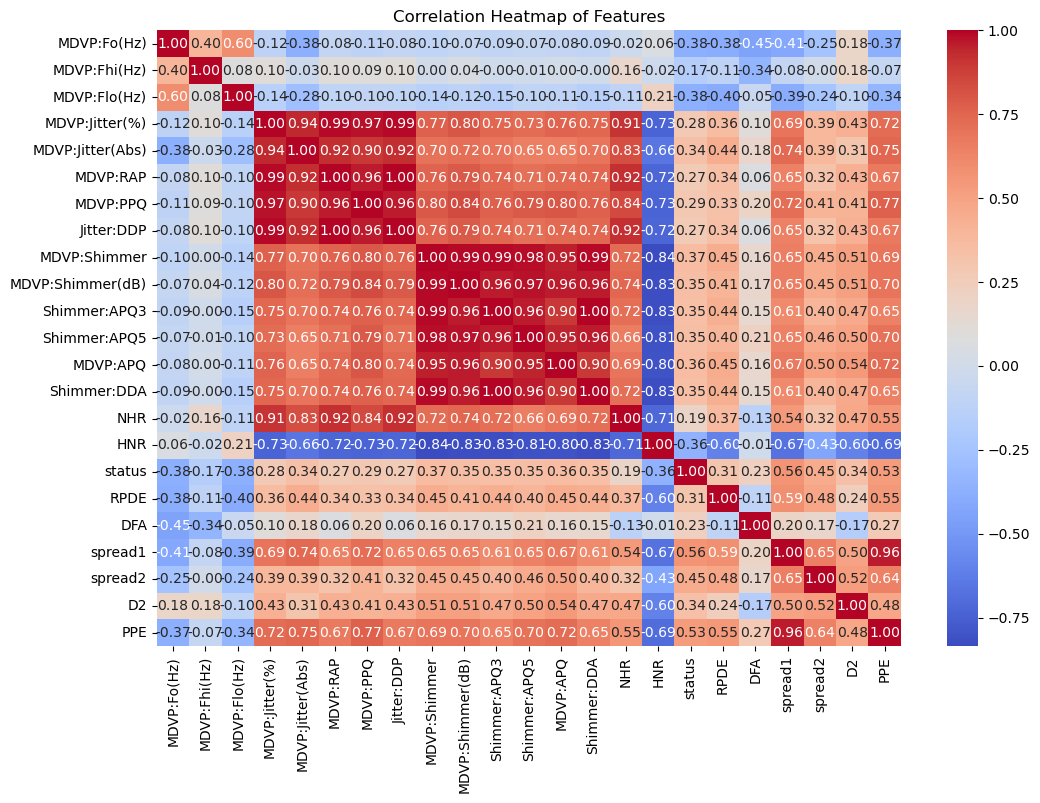

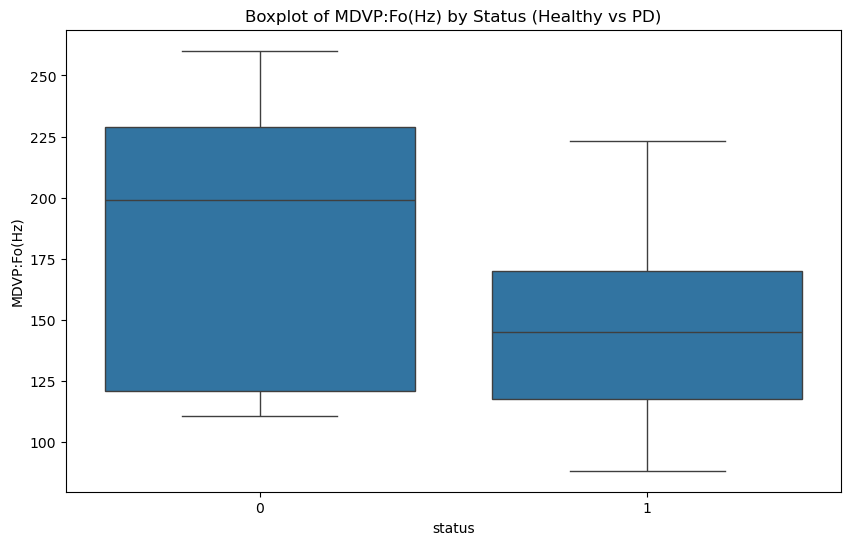

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


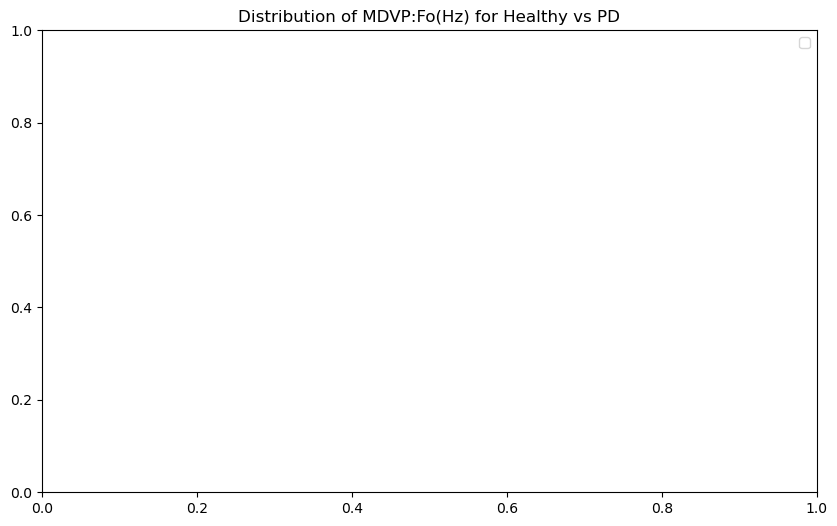

In [85]:
# Data visualization for distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

df['status'] = df['status'].map({'PD': 1, 'healthy': 0})

# Heatmap of correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Boxplot for points of interest (e.g., 'MDVP:Fo(Hz)')
plt.figure(figsize=(10, 6))
sns.boxplot(x="status", y="MDVP:Fo(Hz)", data=df)
plt.title('Boxplot of MDVP:Fo(Hz) by Status (Healthy vs PD)')
plt.show()

# Feature distribution for a key feature (e.g., 'MDVP:Fo(Hz)')
plt.figure(figsize=(10, 6))
sns.histplot(df[df['status'] == 'healthy']['MDVP:Fo(Hz)'], color='green', label='Healthy', kde=True)
sns.histplot(df[df['status'] == 'PD']['MDVP:Fo(Hz)'], color='red', label='PD', kde=True)
plt.legend()
plt.title('Distribution of MDVP:Fo(Hz) for Healthy vs PD')
plt.show()

In [87]:
# Example for stratified cross-validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(LogisticRegression(penalty="l2", max_iter=1000), param_grid={"C": np.arange(0.05, 1.5, 0.05)}, cv=cv, scoring=scorer)
model.fit(z_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=PD))

In [91]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Keep top 10 components
Z_train_pca = pca.fit_transform(z_train)
Z_test_pca = pca.transform(z_test)


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Example of using a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(z_train, y_train)
y_pred_rf = rf.predict(z_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          PD       0.89      1.00      0.94        58
     healthy       1.00      0.65      0.79        20

    accuracy                           0.91        78
   macro avg       0.95      0.82      0.87        78
weighted avg       0.92      0.91      0.90        78

